## NATURAL LANGUAUGE PROCESSING


#### Description of Data: 
The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged according to being ham (legitimate) or spam.


#### 1. Download the file and set it as a Dataframe. (1 Marks)
Ans: For performing this step, w eneed to install spacy with en_core_web_sm, to install en_core_web_sm, use the following command in command prompt: python -m spacy download en_core_web_sm

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import spacy
import nlp
import nltk
from nltk.corpus import stopwords
from spacy import displacy
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

nltk.download("stopwords") 
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

nlp = spacy.load('en_core_web_sm')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aruna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aruna\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\aruna\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [10]:
#Read Source file and set it as a Dataframe
df=pd.read_csv("spam.csv",engine='python')
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


#### 2.  Remove punctuations, special characters and stopwords from the text in ‘sms’ column. Convert the text to lower case. (3 Marks)

In [11]:
#Columns data of v2 is split,so combine all with comma
df['sms'] = df[['v2','Unnamed: 2','Unnamed: 3','Unnamed: 4']].fillna('').sum(axis=1)
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,sms
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,"Nah I don't think he goes to usf, he lives aro..."
...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN,The guy did some bitching but I acted like i'd...


In [12]:
#Remove punctuations, special characters
df["text_no_punc_spl"]=[re.sub("[^A-Za-z0-9]"," ",text) for text in df["sms"]]
df["v2"].head(2)

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
Name: v2, dtype: object

In [14]:
#Remove stopwords from the sms data 
english_stopwords = stopwords.words('english')
for idx,w in df.iterrows():
    wordlist=[]
    for wordsplit in w.text_no_punc_spl.split(" ") :
        if wordsplit.lower().strip()!='' and wordsplit.lower() not in english_stopwords:
            wordlist.append(wordsplit)
    df.at[idx, 'gooddata']= ' '.join(wordlist).lower ()      
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,sms,text_no_punc_spl,gooddata
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only ...,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,"Nah I don't think he goes to usf, he lives aro...",Nah I don t think he goes to usf he lives aro...,nah think goes usf lives around though
...,...,...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN,This is the 2nd time we have tried 2 contact u...,This is the 2nd time we have tried 2 contact u...,2nd time tried 2 contact u u 750 pound prize 2...
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN,Will Ì_ b going to esplanade fr home?,Will b going to esplanade fr home,b going esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN,"Pity, * was in mood for that. So...any other s...",Pity was in mood for that So any other s...,pity mood suggestions
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN,The guy did some bitching but I acted like i'd...,The guy did some bitching but I acted like i d...,guy bitching acted like interested buying some...


#### 3. Create two objects X and y. X will be the v1 column of dataframe and y will be the ‘v2 column. create a CountVectorizer object and split the data into training and testing sets. Train a MultinomialNB model and Display the confusion Matrix (5 Marks)

In [16]:


X=df.gooddata
y=df.v1

# split X and y into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Create vectorizer
vector = CountVectorizer()

# Get the training vectors
X_train_vect = vector.fit_transform(X_train)

# Transforming testing data (using fitted vocabulary) into a document-term matrix
X_test_vect = vector.transform(X_test)

#  Multinomial Naive Bayes model instantiation
nb = MultinomialNB()
nb.fit(X_train_vect, y_train)

# Build the classifier# make class predictions for X_test_vect
y_pred_class = nb.predict(X_test_vect)

# Accuracy of class predictions
print(metrics.accuracy_score(y_test, y_pred_class))

# calculate confusion matrix
cm=metrics.confusion_matrix(y_test, y_pred_class)


0.9844497607655502


In [17]:
# print confusion matrix
print(cm)

[[1433    9]
 [  17  213]]


In [18]:
#confusion matrix
cm_df = pd.DataFrame(cm,
                     index = ['ham','spam'], 
                     columns = ['ham','spam'])

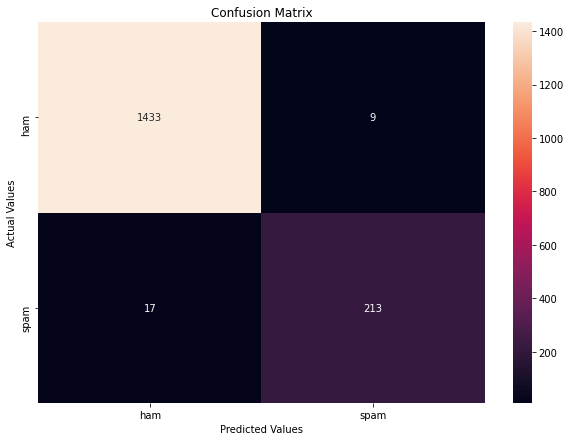

In [19]:
#Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm_df, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

#### 4. Display the POS tagging on the first 4 rows of ‘sms’ (4 Marks)

In [20]:

def posTagging(pos):
    for index, row in df.iloc[:4].iterrows():
        text_orig=row[pos]
        #print(text)
        print("------------------- data-----------------------")
        tokens_o=nltk.word_tokenize(str(text_orig))
        print(nltk.pos_tag(tokens_o))
    print("#################################################################################################")

#Call for Original data
posTagging(1)
#Call for Good data
posTagging(7) 

------------------- data-----------------------
[('Go', 'NNP'), ('until', 'IN'), ('jurong', 'JJ'), ('point', 'NN'), (',', ','), ('crazy', 'JJ'), ('..', 'NN'), ('Available', 'NNP'), ('only', 'RB'), ('in', 'IN'), ('bugis', 'NN'), ('n', 'RB'), ('great', 'JJ'), ('world', 'NN'), ('la', 'NN'), ('e', 'FW'), ('buffet', 'NN'), ('...', ':'), ('Cine', 'NNP'), ('there', 'EX'), ('got', 'VBD'), ('amore', 'RB'), ('wat', 'NN'), ('...', ':')]
------------------- data-----------------------
[('Ok', 'NNP'), ('lar', 'NN'), ('...', ':'), ('Joking', 'NNP'), ('wif', 'WRB'), ('u', 'JJ'), ('oni', 'NN'), ('...', ':')]
------------------- data-----------------------
[('Free', 'JJ'), ('entry', 'NN'), ('in', 'IN'), ('2', 'CD'), ('a', 'DT'), ('wkly', 'JJ'), ('comp', 'NN'), ('to', 'TO'), ('win', 'VB'), ('FA', 'NNP'), ('Cup', 'NNP'), ('final', 'JJ'), ('tkts', 'NN'), ('21st', 'CD'), ('May', 'NNP'), ('2005', 'CD'), ('.', '.'), ('Text', 'VB'), ('FA', 'NNP'), ('to', 'TO'), ('87121', 'CD'), ('to', 'TO'), ('receive', 'VB')

#### 5. Build and display a dependency parser tree for the sentence : “Sansa, the second child of Ned and Catelyn, remained captive in King's Landing after her father was executed.”  ( 2 Marks )

In [21]:

doc = nlp("Sansa, the second child of Ned and Catelyn, remained captive in King's Landing after her father was executed.")
print(displacy.render((doc),jupyter=True))

None
